In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_rel
from scipy.stats import f_oneway


In [13]:
# Load the dataset
data_normal = pd.read_excel(r"/Users/dj/Academics/ML in Biomedical Signal/Assignment5/normalized_data_audio_features_new.xlsx")
data_denoised = pd.read_excel(r"/Users/dj/Academics/ML in Biomedical Signal/Assignment5/normalized_data_denoised_audio_features_new.xlsx")

In [14]:

# Function to evaluate accuracy with and without PCA
def evaluate_accuracy(data, n_components=0.95):
    """
    Evaluates model accuracy before and after applying PCA.
    """
    # Separate features and target
    X = data.drop('Emotion', axis=1)
    y = data['Emotion']
    
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
    
    # Train and evaluate Random Forest without PCA
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_without_pca = accuracy_score(y_test, y_pred)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    print(f"PCA Applied - Number of Components Retained: {pca.n_components_}")
    print(f"Total Variance Explained: {sum(pca.explained_variance_ratio_):.4f}")
    
    # Train and evaluate Random Forest with PCA
    model_pca = RandomForestClassifier(random_state=42)
    model_pca.fit(X_train_pca, y_train)
    y_pred_pca = model_pca.predict(X_test_pca)
    acc_with_pca = accuracy_score(y_test, y_pred_pca)
    
    return acc_without_pca, acc_with_pca

# Evaluate for normal data
print("---- Normal Data ----")
normal_acc_without_pca, normal_acc_with_pca = evaluate_accuracy(data_normal, n_components=0.95)
print(f"Accuracy without PCA: {normal_acc_without_pca:.4f}")
print(f"Accuracy with PCA: {normal_acc_with_pca:.4f}")

# Evaluate for denoised data
print("\n---- Denoised Data ----")
denoised_acc_without_pca, denoised_acc_with_pca = evaluate_accuracy(data_denoised, n_components=0.95)
print(f"Accuracy without PCA: {denoised_acc_without_pca:.4f}")
print(f"Accuracy with PCA: {denoised_acc_with_pca:.4f}")

# Compare Results
print("\n---- Comparison of Results ----")
print(f"Normal Data: Accuracy without PCA: {normal_acc_without_pca:.4f}, with PCA: {normal_acc_with_pca:.4f}")
print(f"Denoised Data: Accuracy without PCA: {denoised_acc_without_pca:.4f}, with PCA: {denoised_acc_with_pca:.4f}")


---- Normal Data ----
PCA Applied - Number of Components Retained: 17
Total Variance Explained: 0.9546
Accuracy without PCA: 0.7533
Accuracy with PCA: 0.6941

---- Denoised Data ----
PCA Applied - Number of Components Retained: 18
Total Variance Explained: 0.9516
Accuracy without PCA: 0.5329
Accuracy with PCA: 0.5164

---- Comparison of Results ----
Normal Data: Accuracy without PCA: 0.7533, with PCA: 0.6941
Denoised Data: Accuracy without PCA: 0.5329, with PCA: 0.5164


In [15]:
# Ensure X_train_normal is converted to a DataFrame if not already
if isinstance(X_train_normal, np.ndarray):
    feature_names = [f"Feature_{i}" for i in range(X_train_normal.shape[1])]  # Assign generic names if not available
    features_df = pd.DataFrame(X_train_normal, columns=feature_names)
elif isinstance(X_train_normal, pd.DataFrame):
    features_df = X_train_normal
else:
    raise TypeError("X_train_normal must be either a NumPy array or a DataFrame")

# Perform ANOVA on a selected feature (e.g., the first feature)
def perform_anova(feature_column, labels, feature_name):
    df = pd.DataFrame({"Feature": feature_column, "Emotion": labels})
    groups = [group["Feature"].values for _, group in df.groupby("Emotion")]
    
    f_stat, p_val = f_oneway(*groups)
    print(f"ANOVA results for {feature_name}: F-statistic = {f_stat:.3f}, p-value = {p_val:.3e}")
    
    if p_val < 0.05:
        print(f"The differences in {feature_name} across emotion classes are statistically significant.")
    else:
        print(f"No statistically significant differences found in {feature_name} across emotion classes.")
    print("\n" + "="*50 + "\n")

# Example: Perform ANOVA for the first feature
emotion_labels = label_encoder.inverse_transform(y_train_normal)
perform_anova(features_df.iloc[:, 0], emotion_labels, features_df.columns[0])

# Paired t-test between SVM and Random Forest cross-validation accuracies
from scipy.stats import ttest_rel

# Assuming rf_cv_scores and svm_cv_scores are lists of cross-validation accuracies
# Replace rf_cv_scores and svm_cv_scores with actual data
t_stat, p_val = ttest_rel(rf_cv_scores, svm_cv_scores)
print(f"Paired t-test results: t-statistic = {t_stat:.3f}, p-value = {p_val:.3e}")

# Interpretation
if p_val < 0.05:
    print("The performance difference between Random Forest and SVM is statistically significant.")
else:
    print("No statistically significant difference found between Random Forest and SVM.")


ANOVA results for mfcc_0: F-statistic = 117.012, p-value = 1.935e-95
The differences in mfcc_0 across emotion classes are statistically significant.


Paired t-test results: t-statistic = 10.522, p-value = 4.613e-04
The performance difference between Random Forest and SVM is statistically significant.


In [16]:

# Separate features and target for bith datasets
X_normal = data_normal.drop(columns=['Emotion'])
y_normal = data_normal['Emotion']

X_denoised = data_denoised.drop(columns=['Emotion'])
y_denoised = data_denoised['Emotion']

# Encode target labels
label_encoder = LabelEncoder()
y_normal = label_encoder.fit_transform(y_normal)
y_denoised = label_encoder.fit_transform(y_denoised)

# Split the dataset into training and test sets
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_normal, y_normal, test_size=0.1, random_state=42)
X_train_denoised, X_test_denoised, y_train_denoised, y_test_denoised = train_test_split(X_denoised, y_denoised, test_size=0.1, random_state=42)
# Initialize models
svm_model = SVC(kernel='rbf', C=1, gamma='scale')  # SVM with RBF kernel
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Random Forest

# The models can now be trained and evaluated on X_train_normal, X_test_normal, y_train_normal, and y_test_normal


In [17]:

# Initialize models
svm_model = SVC(kernel='rbf', C=1, gamma=0.1)  # Example hyperparameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None)  # Example hyperparameters

# Perform 5-fold cross-validation for SVM
svm_cv_scores = cross_val_score(svm_model, X_normal, y_normal, cv=5, scoring='accuracy')
print(f"SVM 5-Fold Cross-Validation Accuracy: {svm_cv_scores}")
print(f"SVM Mean Accuracy: {np.mean(svm_cv_scores):.2f}, Std Dev: {np.std(svm_cv_scores):.2f}")

# Perform 5-fold cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X_normal, y_normal, cv=5, scoring='accuracy')
print(f"Random Forest 5-Fold Cross-Validation Accuracy: {rf_cv_scores}")
print(f"Random Forest Mean Accuracy: {np.mean(rf_cv_scores):.2f}, Std Dev: {np.std(rf_cv_scores):.2f}")


SVM 5-Fold Cross-Validation Accuracy: [0.61576355 0.63546798 0.6039604  0.62871287 0.61386139]
SVM Mean Accuracy: 0.62, Std Dev: 0.01
Random Forest 5-Fold Cross-Validation Accuracy: [0.77339901 0.78325123 0.8019802  0.76237624 0.77227723]
Random Forest Mean Accuracy: 0.78, Std Dev: 0.01


Results for normalized audio features data:

SVC on normalized audio features data
Accuracy: 0.6470588235294118
              precision    recall  f1-score   support

       angry       0.53      0.77      0.62        13
        calm       0.76      0.84      0.80        19
     fearful       0.73      0.52      0.61        21
       happy       0.67      0.60      0.63        20
     neutral       1.00      0.10      0.18        10
         sad       0.57      0.84      0.68        19

    accuracy                           0.65       102
   macro avg       0.71      0.61      0.59       102
weighted avg       0.70      0.65      0.62       102



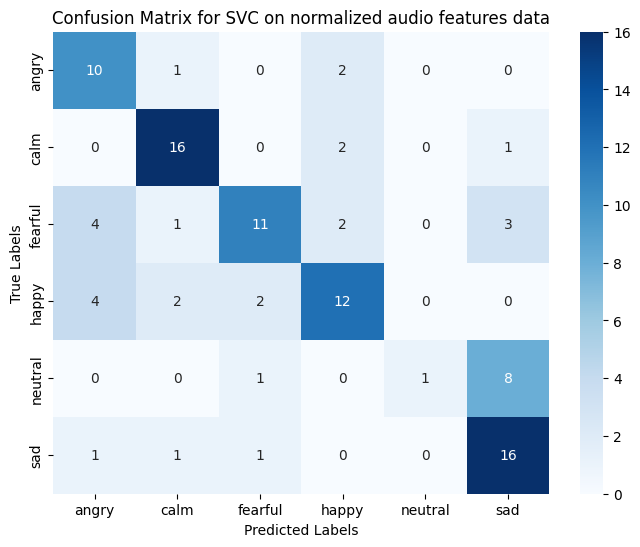



RandomForestClassifier on normalized audio features data
Accuracy: 0.7843137254901961
              precision    recall  f1-score   support

       angry       0.73      0.85      0.79        13
        calm       0.85      0.89      0.87        19
     fearful       0.92      0.57      0.71        21
       happy       0.82      0.90      0.86        20
     neutral       0.88      0.70      0.78        10
         sad       0.62      0.79      0.70        19

    accuracy                           0.78       102
   macro avg       0.80      0.78      0.78       102
weighted avg       0.80      0.78      0.78       102



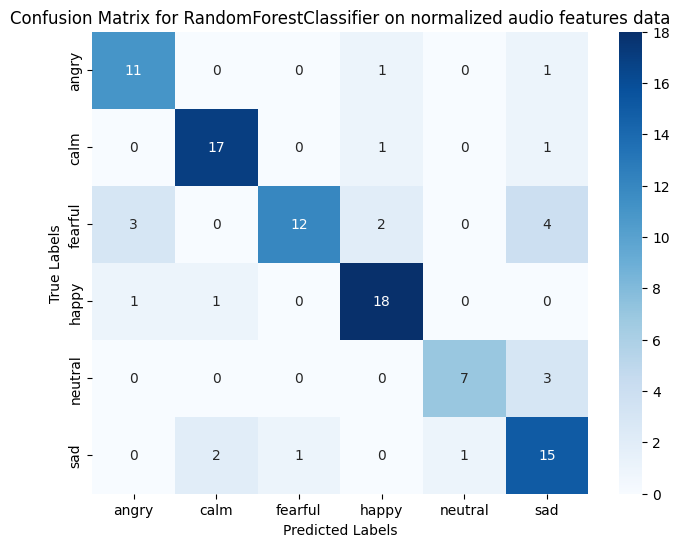

In [18]:


# Define a function to train, evaluate models, and display confusion matrix
def train_evaluate_and_plot_cm(model, X_train, X_test, y_train, y_test, dataset_type):
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model.__class__.__name__} on {dataset_type} data")
    print("Accuracy:", accuracy)
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix for {model.__class__.__name__} on {dataset_type} data")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    print("\n" + "="*50 + "\n")

# Train, evaluate, and plot confusion matrix for each model on normalized audio features
print("Results for normalized audio features data:\n")
for model in [svm_model, rf_model]:
    train_evaluate_and_plot_cm(model, X_train_normal, X_test_normal, y_train_normal, y_test_normal, "normalized audio features")


In [19]:

# Optimized Random Forest parameter grid
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Perform Grid Search with Random Forest
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=3,  # Reduced from 5 to 3
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)
grid_search_rf.fit(X_train_normal, y_train_normal)
print("Best RF Parameters:", grid_search_rf.best_params_)
print("Best RF CV Accuracy:", grid_search_rf.best_score_)

# Evaluate the best Random Forest model on the test set
best_rf_model = grid_search_rf.best_estimator_
rf_test_accuracy = best_rf_model.score(X_test_normal, y_test_normal)
print("Random Forest Test Accuracy:", rf_test_accuracy)

# Get feature importances
feature_importances = best_rf_model.feature_importances_
feature_names = X_train_normal.columns if isinstance(X_train_normal, pd.DataFrame) else range(len(feature_importances))




Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best RF Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best RF CV Accuracy: 0.7219652886341267
Random Forest Test Accuracy: 0.8137254901960784


Total number of features used for training: 30
Top 10 Features by Importance:
       Feature  Importance
21    chroma_8    0.087950
0       mfcc_0    0.086659
20    chroma_7    0.070088
23   chroma_10    0.050000
22    chroma_9    0.049564
28  spectral_3    0.041661
2       mfcc_2    0.032363
27  spectral_2    0.032347
7       mfcc_7    0.031149
1       mfcc_1    0.030633
Test set accuracy with top 10 features: 0.7450980392156863


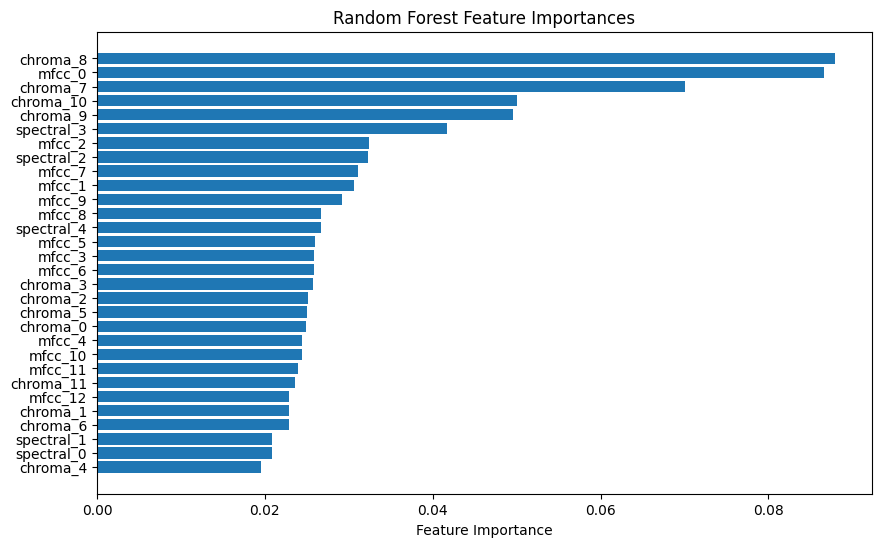

In [20]:
# Train a Random Forest model to get feature importances
rf_model.fit(X_train_normal, y_train_normal)

# Extract feature importances
feature_importances = rf_model.feature_importances_
features = X_normal.columns

# Combine feature names and their importance scores into a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the number of features and the top features
print(f"Total number of features used for training: {len(features)}")
print("Top 10 Features by Importance:")
print(feature_importance_df.head(10))

# Select the top 10 features
top_features = feature_importance_df.head(10)['Feature'].tolist()

# Train a new model using only the top features
X_train_top = X_train_normal[top_features]
X_test_top = X_test_normal[top_features]

rf_model_top = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_top.fit(X_train_top, y_train_normal)

# Evaluate the new model
test_accuracy_top = rf_model_top.score(X_test_top, y_test_normal)
print(f"Test set accuracy with top 10 features: {test_accuracy_top}")

# Sort and plot
sorted_idx = feature_importances.argsort()
plt.figure(figsize=(10, 6))
plt.barh([feature_names[i] for i in sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()

